In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import yaml
import json
from functions_verification import *

In [33]:
# change yaml location here
with open(r"/home/mwegmann/g2s/notebooks/folder_gap_filling.yaml", "r") as f:
    directories = yaml.load(f, Loader=yaml.FullLoader)

In [56]:
# change yaml location here
with open(r"/home/mwegmann/g2s/notebooks/boundary_conditions_gap_filling.yaml", "r") as f:
    conditions = yaml.load(f, Loader=yaml.FullLoader)

In [72]:
# defining folders
input_folder=directories["g2s_input_folder"]

output_folder=input_folder

In [58]:
startyear=2020
today= datetime.today()
endyear=2023

focus_start=conditions["focus_period_start"]
focus_end=conditions["focus_period_end"]

In [35]:
files = [input_folder+filename for filename in rm_point(os.listdir(input_folder))]
json_files=[]
for file in files:
    if file.endswith(".json"):
        json_files.append(file)
sorted_json_files=sorted(json_files)


In [11]:
#variables_of_interest=["T_2M","RELHUM_2M","PMSL","GLOB","CLCT","U","V"]

In [36]:
variables_of_interest=["T_2M","RELHUM_2M","TOT_PREC","PS","GLOB","CLCT","U","V"]

In [37]:
pd_df_list=[]
for json_file in sorted_json_files:
    with open(json_file) as f:
        d = json.load(f)
        pd_list=[]
        for variable in variables_of_interest:
            df=pd.DataFrame(d[variable]["data"],index=d["time"],columns=[variable])
            pd_list.append(df)
        pd_df=pd.concat(pd_list,axis=1)
        pd_df_list.append(pd_df)


In [38]:
all_json_as_pd_df=pd.concat(pd_df_list,axis=0)

In [61]:
all_json_as_pd_df.sort_index(inplace = True)

In [62]:
all_json_as_xr=all_json_as_pd_df.to_xarray()

In [63]:
all_json_as_xr

<xarray.Dataset>
Dimensions:    (index: 66432)
Coordinates:
  * index      (index) object '2020-01-01T00:00:00.000000000' ... '2023-11-20...
Data variables:
    T_2M       (index) float64 275.7 275.6 275.7 275.6 ... 284.7 285.4 285.1
    RELHUM_2M  (index) float64 100.0 98.08 95.64 95.85 ... 63.77 57.7 62.62
    TOT_PREC   (index) float64 0.0001221 0.0002441 9.155e-05 ... 0.0 0.1516 0.0
    PS         (index) float64 9.884e+04 9.88e+04 ... 9.708e+04 9.707e+04
    GLOB       (index) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    CLCT       (index) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0
    U          (index) float64 2.436 1.874 1.989 1.482 ... 4.86 4.492 2.062
    V          (index) float64 -0.0865 0.0285 -0.07111 ... 4.166 2.921 6.369

In [64]:
all_json_as_xr=all_json_as_xr.rename({'index':'time'})

In [65]:
all_json_as_xr["time"]=pd.to_datetime(all_json_as_pd_df.index)

In [66]:
all_json_as_xr

<xarray.Dataset>
Dimensions:    (time: 66432)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 ... 2023-11-20T23:00:00
Data variables:
    T_2M       (time) float64 275.7 275.6 275.7 275.6 ... 284.7 285.4 285.1
    RELHUM_2M  (time) float64 100.0 98.08 95.64 95.85 ... 59.32 63.77 57.7 62.62
    TOT_PREC   (time) float64 0.0001221 0.0002441 9.155e-05 ... 0.0 0.1516 0.0
    PS         (time) float64 9.884e+04 9.88e+04 ... 9.708e+04 9.707e+04
    GLOB       (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    CLCT       (time) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0
    U          (time) float64 2.436 1.874 1.989 1.482 ... 7.464 4.86 4.492 2.062
    V          (time) float64 -0.0865 0.0285 -0.07111 ... 4.166 2.921 6.369

In [69]:
all_json_as_xr_1hr=all_json_as_xr.resample(time="1H").mean()

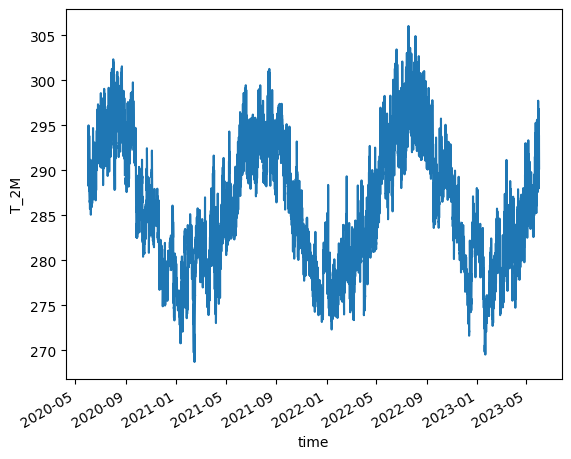

In [71]:
all_json_as_xr_1hr.sel(time=slice(focus_start,focus_end)).T_2M.plot()

In [73]:
all_json_as_xr_1hr.sel(time=slice(focus_start,focus_end)).to_netcdf(output_folder+"cosmo_1hr_g2s.nc")